In this notebook, I am analysing a treatment cost data set of different patients. Because the diagnosis remains confidential, the available information is on the factors such as age, sex, bmi, smoking etc. Using such factors can also give a good estimation and help to make a conclusion about the costs and health. This is a regression analysis

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
sns.set(style = "darkgrid")


In [5]:
df1 = pd.read_csv('D:\work\projects\medical_cost\insurance\insurance.csv')

Lets start with some simple data visualization and exploration.. 


In [6]:
print(df1.head(5)) 
df1.isnull().sum()


age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are 6 factors and one coloumn for information on charges/cost. I checked if there are any NaN values in the data. Now, lets have a look at the description of the data that we have. 

In [7]:
print(df1.describe())


age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


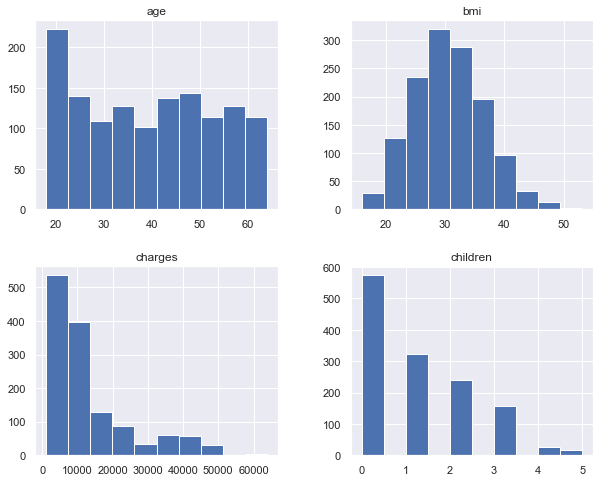

In [8]:
fig, ax = plt.subplots(figsize = (10,8))
df1.hist(ax = ax )
plt.show()

But there is no information on sex, smoking and region! so lets encode the categorical features first. 

In [9]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()

label_en.fit(df1.sex.drop_duplicates())
df1.sex = label_en.transform(df1.sex)

label_en.fit(df1.smoker.drop_duplicates())
df1.smoker = label_en.transform(df1.smoker)

label_en.fit(df1.region.drop_duplicates())
df1.region = label_en.transform(df1.region)

print(df1.head(5))



age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


Now we have the info on sex, smoking and region as well. 

In [10]:
df1.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


highest correlation of health costs are with somking, this information itself is very useful, but it is kind of obvious as well. Just for the sake of visualization


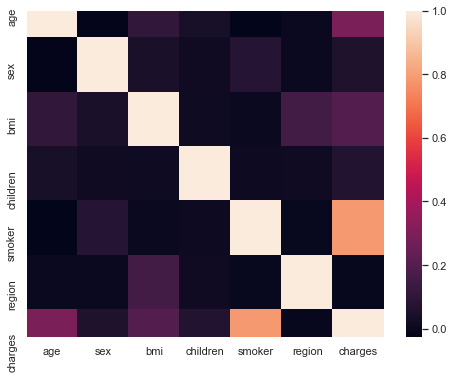

In [11]:
# Just for the sake of visualization
figure, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df1.corr(),ax = ax)

Lets focus now on charges and smoking 

Text(0.5, 1.0, 'charges distribution - non-smokers')

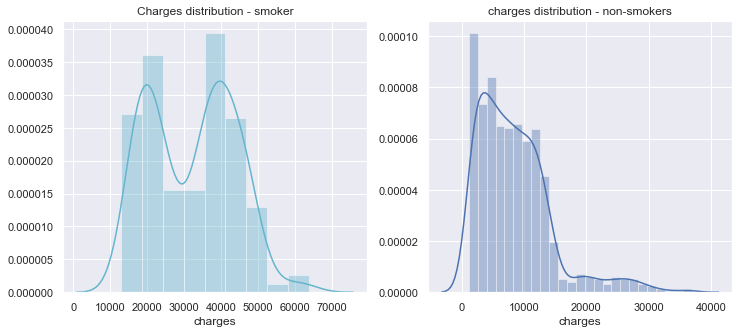

In [12]:
fig = plt.figure(figsize=(12,5))

ax=fig.add_subplot(1,2,1)
sns.distplot(df1[(df1.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Charges distribution - smoker')

ax=fig.add_subplot(1,2,2)
sns.distplot(df1[(df1.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('charges distribution - non-smokers')

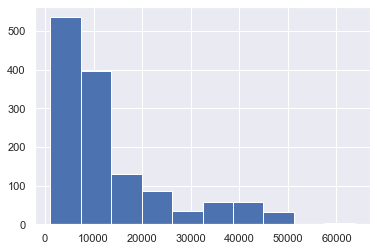

In [13]:
df1.charges.hist()
plt.show()

I am curious to know if there is a difference in bmi in aged smoker and nonsmoker individuals

In [14]:
df1['age_cat'] = np.nan
lst = [df1]

for col in lst:
    col.loc[(col['age'] >= 50), 'age_cat'] = 'Elder'
    col.loc[(col['age'] < 35), 'age_cat'] = 'young_adult'
    col.loc[(col['age'] >= 35) & (col['age'] < 50), 'age_cat'] = 'old_adult'




label = df1['age_cat'].unique().tolist()
print(label)
counts = df1['age_cat'].value_counts().tolist()
print(counts)

['young_adult', 'old_adult', 'Elder']
[549, 404, 385]


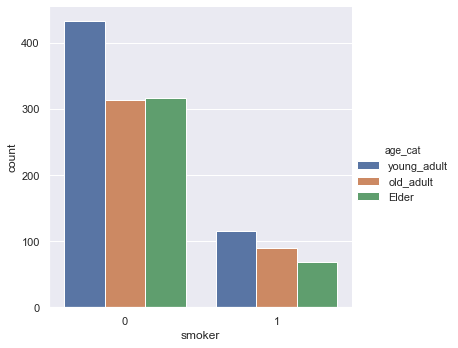

In [15]:
sns.catplot(x="smoker", kind="count",hue = 'age_cat', data=df1)


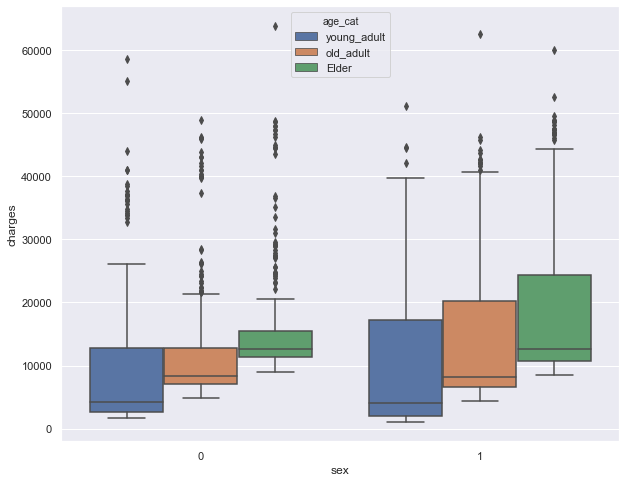

In [16]:
fig= plt.figure(figsize=(10,8))
sns.boxplot(x = 'sex',y = 'charges', hue = 'age_cat', data = df1)

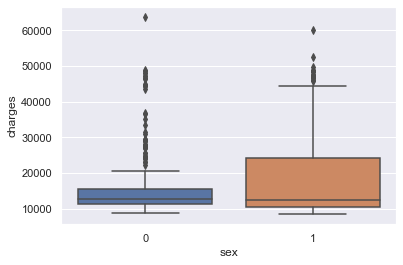

In [17]:
sns.boxplot(x = 'sex',y = 'charges', data = df1[df1.age_cat == 'Elder'])

#why
#how about bmi


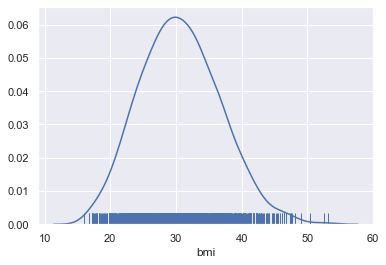

In [18]:
sns.distplot(df1["bmi"], hist = False, rug = True)




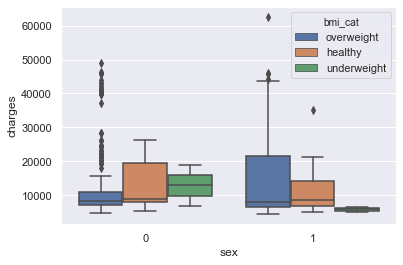

In [19]:
df1['bmi_cat'] = np.NaN
lst =[df1]

for col in lst:
    col.loc[(col['bmi'] < 18.5), 'bmi_cat'] = 'underweight' #18.5 – you're in the underweight
    col.loc[(col['bmi'] >= 18.5) & (col['bmi'] < 24.9 ), 'bmi_cat'] = 'healthy'
    col.loc[(col['bmi'] >= 24.9) ,'bmi_cat'] = 'overweight'


sns.boxplot(x = 'sex', y = 'charges', hue = 'bmi_cat', data =df1[df1.age_cat == 'old_adult'])




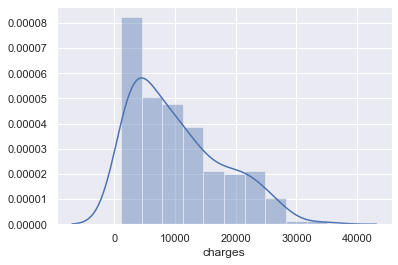

In [20]:
sns.distplot(df1[df1.bmi_cat == 'healthy']['charges'])

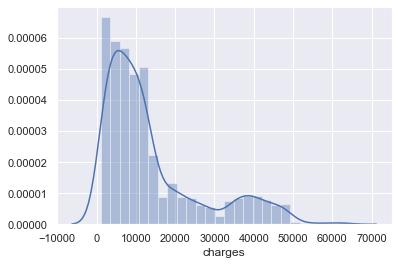

In [21]:
sns.distplot(df1[df1.bmi_cat == 'overweight']['charges'])

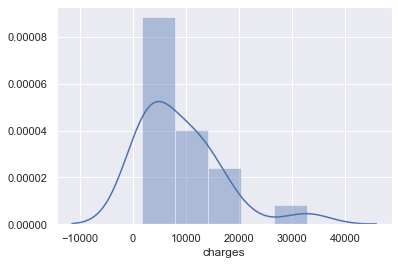

In [22]:
sns.distplot(df1[df1.bmi_cat == 'underweight']['charges'])

In [23]:
label = df1['bmi_cat'].unique().tolist()
print(label)
counts = df1['bmi_cat'].value_counts().tolist()
print(counts)

['overweight', 'healthy', 'underweight']
[1096, 222, 20]


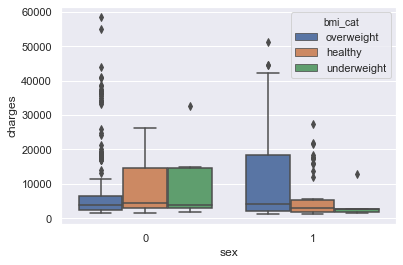

In [24]:
sns.boxplot(x = 'sex', y = 'charges', hue = 'bmi_cat', data =df1[df1.age_cat == 'young_adult'])


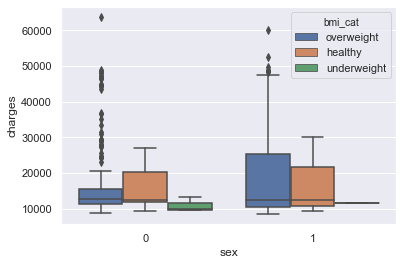

In [25]:
sns.boxplot(x = 'sex', y = 'charges', hue = 'bmi_cat', data =df1[df1.age_cat == 'Elder'])


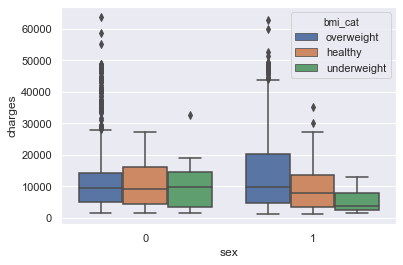

In [26]:
sns.boxplot(x = 'sex', y = 'charges', hue = 'bmi_cat', data =df1)


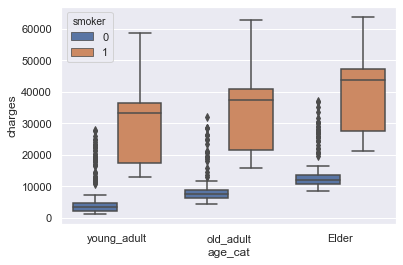

In [27]:
sns.boxplot(x = 'age_cat', y = 'charges', hue = 'smoker', data =df1)

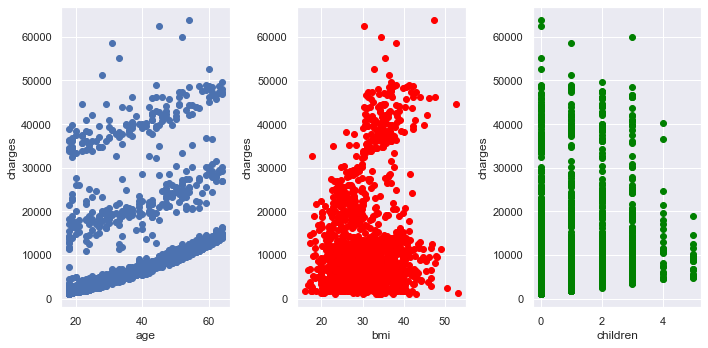

In [28]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_size_inches(10,5)

ax1.scatter(df1.age,df1.charges)
ax2.scatter(df1.bmi,df1.charges, color='red')
ax3.scatter(df1.children,df1.charges, color = 'green')
ax1.set(xlabel = 'age', ylabel = 'charges')
ax2.set(xlabel = 'bmi', ylabel = 'charges')
ax3.set(xlabel = 'children', ylabel = 'charges')

plt.tight_layout()


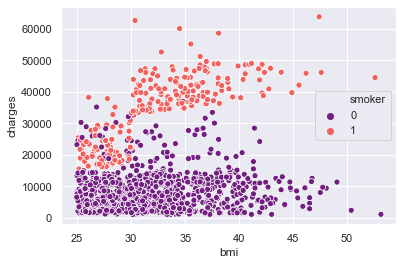

In [29]:
ax = sns.scatterplot(x='bmi',y='charges',data=df1[df1.bmi_cat =='overweight'],palette='magma',hue='smoker')


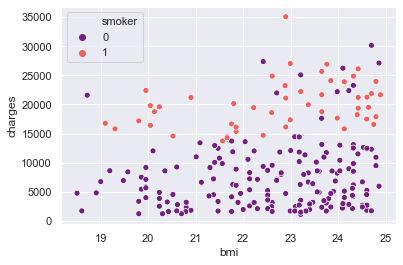

In [30]:
ax = sns.scatterplot(x='bmi',y='charges',data=df1[df1.bmi_cat =='healthy'],palette='magma',hue='smoker')

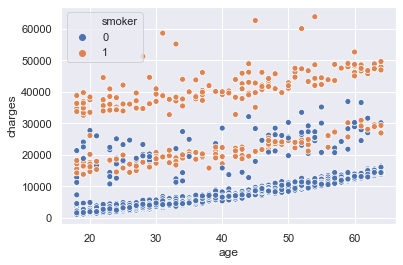

In [31]:
ax = sns.scatterplot(x='age',y='charges',data=df1,hue='smoker')

age       sex       bmi  children    smoker    region   charges
0 -1.438764 -1.010519 -0.453320 -0.908614  1.970587  1.343905  0.298584
1 -1.509965  0.989591  0.509621 -0.078767 -0.507463  0.438495 -0.953689
2 -0.797954  0.989591  0.383307  1.580926 -0.507463  0.438495 -0.728675
3 -0.441948  0.989591 -1.305531 -0.908614 -0.507463 -0.466915  0.719843
4 -0.513149  0.989591 -0.292556 -0.908614 -0.507463 -0.466915 -0.776802
1003
1075   -0.719309
131     0.028577
15     -0.944463
1223    1.061936
1137   -0.833848
Name: charges, dtype: float64


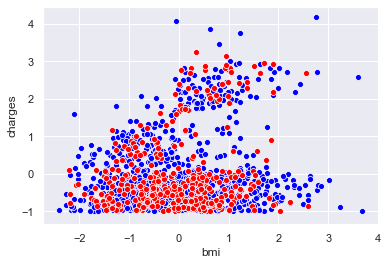

In [32]:
from sklearn.model_selection import train_test_split
df2 = df1.drop(['age_cat', 'bmi_cat'], axis = 1)

from sklearn import preprocessing
 
df2 = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df2), columns=df2.columns, index=df2.index)

print(df2.head())

x = df2.drop(['charges'], axis = 1)
y = df2.charges



x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0)
print(len(x_train.bmi))
print(y_train.head())

ax = sns.scatterplot(x=x_train.bmi,y=y_train,data=df1,color = 'blue')
ax = sns.scatterplot(x=x_test.bmi,y=y_test,data=df1, color = 'red')






In [33]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


linreg = LinearRegression().fit(x_train,y_train)

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

print(linreg.score(x_test,y_test))




print('mean absolute error: %.2f' %np.mean(np.absolute(y_test_pred - y_test)))
print('residual sum of squres (Mean squared error MSE) %2f' %np.mean((y_test_pred - y_test)**2))
print('R2 score %2f' %r2_score(y_test_pred ,y_test))







0.7962732059725784
mean absolute error: 0.33
residual sum of squres (Mean squared error MSE) 0.218869
R2 score 0.721385


In [34]:
#what if I take only smoker as we know it has high correlation
x_trainsm = np.asanyarray(x_train[['smoker']])

y_trainsm = np.asanyarray(y_train)

x_testsm = np.asanyarray(x_test[['smoker']])
y_testsm = np.asanyarray(y_test)


lin_reg_sm = LinearRegression().fit(x_trainsm,y_trainsm)

y_train_pred_sm = lin_reg_sm.predict(x_trainsm)
y_test_pred_sm = lin_reg_sm.predict(x_testsm)

print(lin_reg_sm.score(x_testsm,y_testsm))
print('mean absolute error: %.2f' %np.mean(np.absolute(y_test_pred_sm, - y_testsm)))
print('residual sum of squres (Mean squared error MSE) %2f' %np.mean((y_test_pred_sm - y_testsm)**2))
print('R2 score %2f' %r2_score(y_test_pred_sm ,y_testsm))

0.6620408185344615
mean absolute error: 0.63
residual sum of squres (Mean squared error MSE) 0.363078
R2 score 0.403965


In [35]:
#what if I take only smoker as we know it has high correlation
x_train_ml = np.asanyarray(x_train[['smoker','bmi','age']])

y_train_ml = np.asanyarray(y_train)

x_test_ml = np.asanyarray(x_test[['smoker','bmi','age']])
y_test_ml = np.asanyarray(y_test)


lin_reg_ml = LinearRegression().fit(x_train_ml,y_train_ml)

y_train_pred_ml = lin_reg_ml.predict(x_train_ml)
y_test_pred_ml = lin_reg_ml.predict(x_test_ml)

print(lin_reg_ml.score(x_test_ml,y_test_ml))
print('mean absolute error: %.2f' %np.mean(np.absolute(y_test_pred_ml, - y_test_ml)))
print('residual sum of squres (Mean squared error MSE) %2f' %np.mean((y_test_pred_ml - y_test_ml)**2))
print('R2 score %2f' %r2_score(y_test_pred_ml ,y_test_ml))


0.7924327534321974
mean absolute error: 0.70
residual sum of squres (Mean squared error MSE) 0.222995
R2 score 0.720377


In [36]:
#polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_poly,y, random_state = 0)





In [37]:
clf = LinearRegression().fit(x_train_p, y_train_p)
y_train_poly_pred = clf.predict(x_train_p)
y_test_poly_pred = clf.predict(x_test_p)


In [38]:

print(clf.score(x_test_p,y_test_p))


0.8845996966670043


The residual sum of squares doesn't have much meaning without knowing the total sum of squares (from which R^2 can be calculated). Its value is going to increase if your data have large values or if you add more data points, regardless of how good your fit is. Also, you may want to look at a plot of your residuals versus fitted data, there is a clear pattern that should be explained by your model to ensure that your errors are Normally distributed.

objective of multiple linear regression is to minimize MSE

$MSE =\frac{1}{n} \sum_{i=1}^{n} ((y_i - \hat y_i)^2$

To minimize this we need to find the best parameters for the linear regression equation

$\hat y = \theta ^T X$


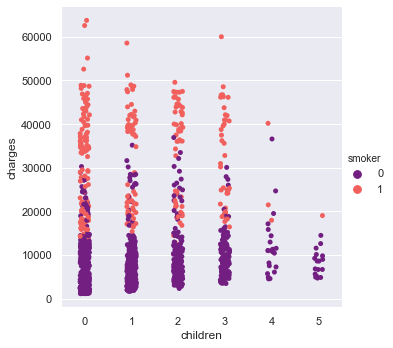

In [39]:
ax = sns.catplot(x='children',y='charges',data=df1,palette='magma',hue='smoker')